In [36]:
#r "nuget:ScottPlot, 5.0.*"

Error: ScottPlot version 5.0.* cannot be added because version 5.0.56 was added previously.

In [37]:
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);

In [38]:
// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plt = new();
plt.Add.Scatter(dataX, dataY);

// display the plot



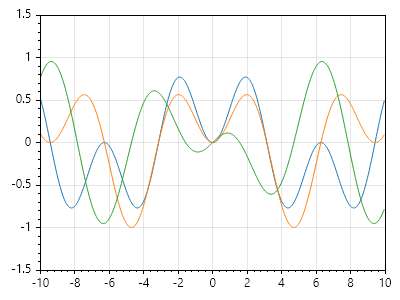

In [39]:
ScottPlot.Plot myPlot = new();

// Functions are defined as delegates with an input and output
static double func1(double x) => (Math.Sin(x) * Math.Sin(x / 2));
static double func2(double x) => (Math.Sin(x) * Math.Sin(x / 3));
static double func3(double x) => (Math.Cos(x) * Math.Sin(x / 5));



// Add functions to the plot
myPlot.Add.Function(func1);
myPlot.Add.Function(func2);
myPlot.Add.Function(func3);

// Manually set axis limits because functions do not have discrete data points
myPlot.Axes.SetLimits(-10, 10, -1.5, 1.5);

myPlot.SavePng("demo.png", 400, 300);
myPlot


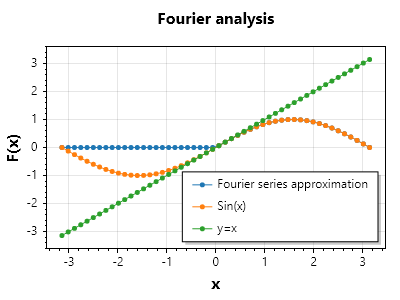

In [43]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 50;
int Harmonics=50;

// 1. Setup data arrays
double xStart = -PI; 
double xEnd = PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        sum +=  Cos( (Double) (2 * n) * x[i])/ ((Double) (4*n*n -1));
    }
    y[i] = (1/PI)  + 0.5 * Sin(x[i])-  (2/(PI)) * sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series approximation";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 400, 300);
    plt



In [41]:
Console.WriteLine(ys[3]);

-2.8380676201561483E-05
